# Inicialización

In [ ]:
import sklearn
import pandas
import numpy as np

file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/YearPredictionMSD.txt"

X = pandas.read_csv(file, sep=",")

X = X.to_numpy()

y = X[:,0]

X = X[:,1:]

from sklearn.model_selection import train_test_split

# Conjuntos de train y test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print("Conjunto de training: ",x_train.shape, " // ", y_train.shape)
print("Conjunto de test: ",x_test.shape, " // ", y_test.shape)

Conjunto de training:  (412275, 90)  //  (412275,)
Conjunto de test:  (103069, 90)  //  (103069,)


In [ ]:
pandas.DataFrame(x_test).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_test.csv")
pandas.DataFrame(y_test).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_test.csv")

In [ ]:
pandas.DataFrame(x_train).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train.csv")
pandas.DataFrame(y_train).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_train.csv")

In [ ]:
import pandas
X = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train.csv").to_numpy()[:,1:]
y = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_train.csv").to_numpy()[:,1:].transpose()[0]

print(X.shape)
print(y.shape)

(412275, 90)
(412275,)


# Análisis de datos

## Canciones por año

(array([2.12000e+02, 1.82000e+02, 2.40000e+02, 1.62200e+03, 5.75300e+03,
        1.58600e+04, 2.19040e+04, 4.89740e+04, 1.22587e+05, 1.94941e+05]),
 array([1922. , 1930.9, 1939.8, 1948.7, 1957.6, 1966.5, 1975.4, 1984.3,
        1993.2, 2002.1, 2011. ]),
 <a list of 10 Patch objects>)

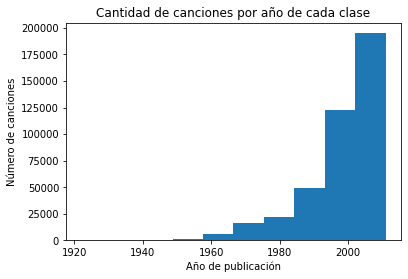

In [ ]:
import matplotlib.pyplot as plt

plt.title("Cantidad de canciones por año de cada clase")
plt.ylabel("Número de canciones")
plt.xlabel("Año de publicación")
plt.hist(y)

In [ ]:
print(np.unique(y))

[1922. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934.
 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946.
 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.]


## Resumen de variables

In [ ]:
for i in range(len(X[0])):
  print("Variable ",i,": Media: ",np.average(X[:,i])," // Desv. tipica: ",np.std(X[:,i]))

# Escalado

In [ ]:
import time

print(time.time(),time.process_time())
time.sleep(1)
print(time.time(),time.process_time())

1653899195.2648559 31.820167555
1653899196.2768848 31.837260824


Analizamos cuál es la mejor normalización entre minmax y standard

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
import numpy as np
import time

E_vals = {"std": 0.0, "min_max": 0.0}
tiempos = {"std": 0.0, "min_max": 0.0}

# cross_validation con standard scaler
scalerstd = StandardScaler()
scalerstd.fit(X)
X_std = scalerstd.transform(X)
## Los parámetros de SGDRegressor se ajustarán y/o se justificarán posteriormente
inicio = time.process_time()
E_vals["std"] = -cross_val_score(SGDRegressor(), X_std,y,scoring='neg_mean_squared_error').mean()
end = time.process_time()
tiempos["std"] = (end-inicio)

In [ ]:
# CV con minmax
scalerminmax = MinMaxScaler()
scalerminmax.fit(X)
X_minmax = scalerminmax.transform(X)
inicio = time.process_time()
E_vals["min_max"] = -cross_val_score(SGDRegressor(), X_minmax,y,scoring='neg_mean_squared_error').mean()
end = time.process_time()
tiempos["min_max"] = (end-inicio)

In [ ]:
E_vals["min_max"] = E_vals["std"]
tiempos["min_max"] = tiempos["std"]
inicio = time.process_time()
E_vals["std"] = -cross_val_score(SGDRegressor(), X_std,y,scoring='neg_mean_squared_error').mean()
fin = time.process_time()
tiempos["std"] = (fin-inicio)

<BarContainer object of 2 artists>

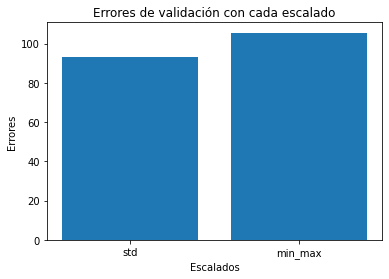

In [ ]:
import matplotlib.pyplot as plt

plt.title("Errores de validación con cada escalado")
plt.xlabel("Escalados")
plt.ylabel("Errores")
plt.bar(list(E_vals.keys()),E_vals.values())

<BarContainer object of 2 artists>

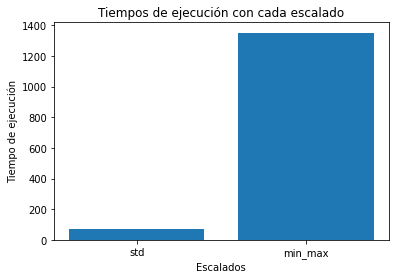

In [ ]:
plt.title("Tiempos de ejecución con cada escalado")
plt.xlabel("Escalados")
plt.ylabel("Tiempo de ejecución (s)")
plt.bar(list(tiempos.keys()),tiempos.values())

In [ ]:
X = X_std

# Reducción de dimensionalidad

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import time

Evals = []
xs = []
times = []

for i in range(11):
  pca = PCA(n_components=(0.9+(i/100)))
  pca.fit(X)
  X_i = pca.transform(X)
  start = time.process_time()
  Evals.append(-cross_val_score(SGDRegressor(), X_i, y, scoring='neg_mean_squared_error').mean())
  end = time.process_time()
  times.append((end-start))
  xs.append(0.9+(i/100))

In [ ]:
start = time.process_time()
Evals.append(-cross_val_score(SGDRegressor(), X, y, scoring='neg_mean_squared_error').mean())
end = time.process_time()
times.append(end-start)
xs.append(1)

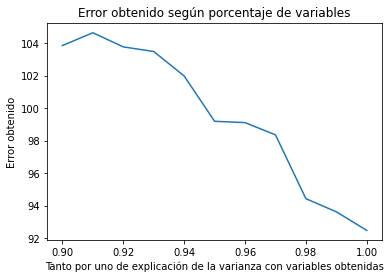

In [ ]:
import matplotlib.pyplot as plt

plt.title("Error obtenido según porcentaje de variables")
plt.xlabel("Tanto por uno de explicación de la varianza con variables obtenidas")
plt.ylabel("Error obtenido")
plt.plot(xs,Evals)

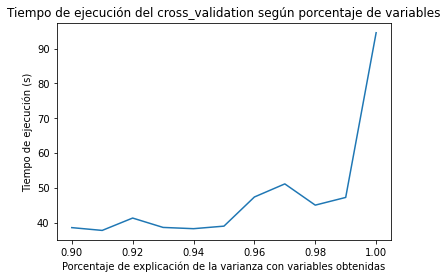

In [ ]:
plt.title("Tiempo de ejecución del cross_validation según porcentaje de variables")
plt.xlabel("Porcentaje de explicación de la varianza con variables obtenidas")
plt.ylabel("Tiempo de ejecución (s)")
plt.plot(xs,times)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
pca.fit(X)
X = pca.transform(X)

In [ ]:
print(X.shape)

(412275, 77)


In [ ]:
pandas.DataFrame(X).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train_reduced_scaled.csv")

# Ajuste de hiperparámetros


In [ ]:
import pandas
X = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train_reduced_scaled.csv").to_numpy()[:,1:]
y = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_train.csv").to_numpy()[:,1:].transpose()[0]

print(X.shape)
print(y.shape)

(412275, 77)
(412275,)


## Max iter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
import time

E_vals_iters = []
times_iters = []
max_iter = 1e2
xs_iter = []

for i in range(5):
  inicio = time.time()
  E_vals_iters.append(-cross_val_score(SGDRegressor(max_iter=max_iter),X,y,scoring='neg_mean_squared_error',n_jobs=-1).mean())
  fin = time.time()
  times_iters.append(fin-inicio)
  xs_iter.append(max_iter)
  max_iter*=10

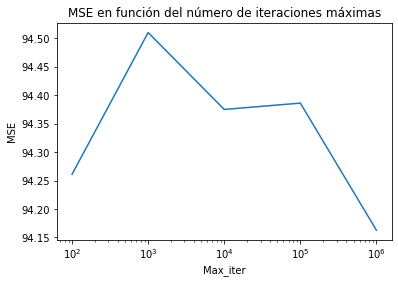

In [ ]:
import matplotlib.pyplot as plt

plt.title("MSE en función del número de iteraciones máximas")
plt.xlabel("Max_iter")
plt.ylabel("MSE")
plt.xscale("log")
plt.plot(xs_iter,E_vals_iters)

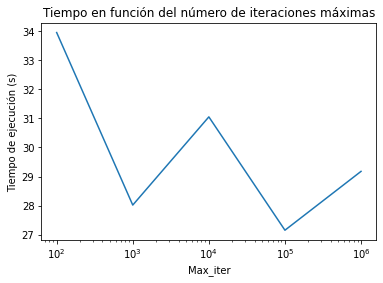

In [ ]:
plt.title("Tiempo en función del número de iteraciones máximas")
plt.xlabel("Max_iter")
plt.ylabel("Tiempo de ejecución (s)")
plt.xscale("log")
plt.plot(xs_iter,times_iters)

## Tipo de error, regularización, alpha, tipo de learning rate

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

params = {'loss':['squared_error','huber'],
          'penalty':['l1','l2'],
          'alpha':[1e-3,1e-2,1e-1],
          'learning_rate':['optimal','invscaling'],
          }

pla = GridSearchCV(SGDRegressor(max_iter=100),params,scoring='neg_mean_squared_error',n_jobs=-1)
pla.fit(X,y)

GridSearchCV(estimator=SGDRegressor(max_iter=100), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'learning_rate': ['optimal', 'invscaling'],
                         'loss': ['squared_error', 'huber'],
                         'penalty': ['l1', 'l2']},
             scoring='neg_mean_squared_error')

In [ ]:
print(pla.best_params_)

{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_error', 'penalty': 'l1'}


In [ ]:
modelo = SGDRegressor(penalty='l1',alpha=0.01, max_iter=100,learning_rate='optimal')
modelo.fit(X,y)

SGDRegressor(alpha=0.01, learning_rate='optimal', max_iter=100, penalty='l1')

# Entrenamiento del modelo

In [ ]:
import pandas
X = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train_reduced_scaled.csv").to_numpy()[:,1:]
y = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_train.csv").to_numpy()[:,1:].transpose()[0]

print(X.shape)
print(y.shape)

(412275, 77)
(412275,)


In [ ]:
from sklearn.linear_model import SGDRegressor

modelo = SGDRegressor(penalty='l1',alpha=0.01,max_iter=100,learning_rate='optimal')
modelo.fit(X,y)

SGDRegressor(alpha=0.01, learning_rate='optimal', max_iter=100, penalty='l1')

In [ ]:
modelo.score(X,y)

0.2204773380409153

In [ ]:
from sklearn.metrics import mean_squared_error

print("E_in: ",mean_squared_error(y, modelo.predict(X)))

E_in:  93.53388031502975


## SGDRegressor vs Estimador naive (media)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

Evs = {'SGD':cross_val_score(SGDRegressor(penalty='l1',alpha=0.01,max_iter=100,learning_rate='optimal'),X,y,scoring='neg_mean_squared_error',n_jobs=-1),
       'avg':cross_val_score(DummyRegressor(strategy='mean'),X,y,scoring='neg_mean_squared_error',n_jobs=-1)}

In [ ]:
print("Relación desempeño SGD vs Media: ", -Evs['SGD'].mean(),", ", -Evs['avg'].mean())

Relación desempeño SGD vs Media:  93.57876489632613 ,  120.00560257326154


## Otra métrica de error

In [ ]:
import math
def sq_error_divided(y_true,y_predict):
  errs = {1920:0.0,1940:0.0,1960:0.0,1980:0.0,2000:0.0}
  counts = {1920:0,1940:0,1960:0,1980:0,2000:0}
  for i in range(y_true.size):
    errs[y_true[i]//20*20] += (y_true[i]-y_predict[i])**2
    counts[y_true[i]//20*20] += 1
  for key in list(errs.keys()):
    errs[key] /= counts[key]
  return errs

In [ ]:
print(sq_error_divided(y,modelo.predict(X)))

{1920: 3236.867911029152, 1940: 1392.9339831051866, 1960: 523.595689456425, 1980: 45.74294887624345, 2000: 48.42445427530583}


# Acotación Eout

In [ ]:
import pandas
X_test = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_test.csv").to_numpy()[:,1:]
y_test = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_test.csv").to_numpy()[:,1:].transpose()[0]

print(X_test.shape)
print(y_test.shape)

(103069, 90)
(103069,)


## Escalado (normalización)

In [ ]:
import pandas
X = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_train.csv").to_numpy()[:,1:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerstd = StandardScaler()
scalerstd.fit(X)
X = scalerstd.transform(X)
X_test_scaled = scalerstd.transform(X_test)
print(X_test_scaled.shape)

(103069, 90)


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
pca.fit(X)
X_test_scaled_transformed = pca.transform(X_test_scaled)
print(X_test_scaled_transformed.shape)

(103069, 77)


In [ ]:
pandas.DataFrame(X_test_scaled_transformed).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_test_scaled_transformed.csv")

## Cota

In [ ]:
import pandas

X_test = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/X_test_scaled_transformed.csv").to_numpy()[:,1:]
y_test = pandas.read_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Regresion/data/y_test.csv").to_numpy()[:,1:].transpose()[0]

print(X_test.shape)
print(y_test.shape)

(103069, 77)
(103069,)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("Cota Eout: ", mean_squared_error(y_test, modelo.predict(X_test))+np.sqrt(1/(2*y_test.size)*np.log(2/0.05)))

Cota Eout:  91.2247133504684


# Curvas de aprendizaje

## Con regularización

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import numpy as np

modelo = SGDRegressor(penalty='l1',alpha=0.01,max_iter=100,learning_rate='optimal')

xs, Eins, Eouts = learning_curve(modelo, X,y,train_sizes=np.linspace(0.01,0.1,20),scoring='neg_mean_squared_error')

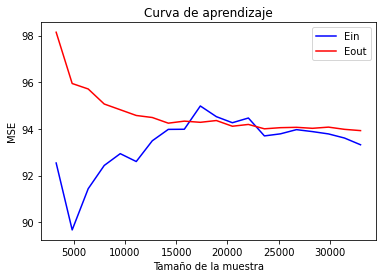

In [ ]:
import matplotlib.pyplot as plt

plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("MSE")
plt.plot(xs, -Eins.mean(axis=1), c='b',label='Ein')
plt.plot(xs, -Eouts.mean(axis=1), c='r',label='Eout')
plt.legend()

In [ ]:
Eins = []
Evals = []
Ns = []

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

modelo = SGDRegressor(penalty='l1',alpha=0.01,max_iter=100,learning_rate='optimal')

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=0)

for i in np.linspace(0.01,0.1,20):
  N = int(i*y_train.size)
  modelo.fit(X_train[:N,:],y_train[:N])
  Eins.append(mean_squared_error(y_train,modelo.predict(X_train)))
  Evals.append(mean_squared_error(y_val,modelo.predict(X_val)))
  Ns.append(N)

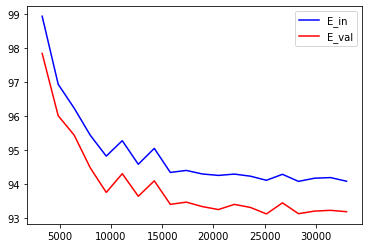

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ns, Eins, c='b',label='E_in')
plt.plot(Ns, Evals, c='r',label='E_val')
plt.legend()
plt.show()